In [1]:
import pandas as pd
import numpy as np


In [2]:
df_cars = pd.read_csv('/content/recalls_2022.csv', encoding='cp949')
df_cars.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


In [3]:
print(len(df_cars))

1419


In [4]:
df_cars['제작자'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1414    False
1415    False
1416    False
1417    False
1418    False
Name: 제작자, Length: 1419, dtype: bool

In [5]:
print(df_cars['제작자'].isnull().sum())
print(df_cars['차명'].isnull().sum())
print(df_cars['생산기간(부터)'].isnull().sum())
print(df_cars['생산기간(까지)'].isnull().sum())
print(df_cars['리콜개시일'].isnull().sum())
print(df_cars['리콜사유'].isnull().sum())

0
0
0
0
0
0


In [6]:
print(df_cars['제작자'].duplicated().sum())
print(df_cars['차명'].duplicated().sum())
print(df_cars['생산기간(부터)'].duplicated().sum())
print(df_cars['생산기간(까지)'].duplicated().sum())
print(df_cars['리콜개시일'].duplicated().sum())
print(df_cars['리콜사유'].duplicated().sum())

1383
691
486
508
1285
1154


In [7]:
print(df_cars["차명"].unique())

['CBR1000RR-R' 'Polo 5 FL 1.4 TDI BMT' 'Jetta 6 FL 2.0 TDI 110PS'
 'Jetta 1.6 TDI BMT' 'Golf A7 1.6 TDI BMT' 'Golf 1.6 TDI BMT'
 'GLC 220 d 4MATIC' 'E 220 d 4MATIC' 'GLE 350 e 4MATIC Coupe'
 'GLE 350 e 4MATIC' 'Tiguan 2.0 TDI BMT' 'Tiguan 2.0 TDI' 'BMW i4 M50'
 'BMW i4 eDrive40' 'C 300' 'C 200 4MATIC' 'TGX' 'TGS' '파나메라' '카이엔' '타이칸'
 '911 카레라' '마이브M1' '싼타페 하이브리드 (TM PE HEV)' '싼타페 (TM PE)' 'Model S'
 'Rolls-Royce Ghost EWB' 'Rolls-Royce Ghost Black Badge'
 'Rolls-Royce Ghost' 'BMW X6 xDrive40i' 'BMW X6 xDrive40d'
 'BMW X6 xDrive30d' 'BMW X6 M50i' 'BMW X6 M50d' 'BMW X2 xDrive20i' '500X'
 '200' '짚컴패스' '짚체로키' '짚레니게이드' 'CLS 300 d 4MATIC' 'Maybach S 580 4MATIC'
 'S 580 4MATIC' 'GLE 300 d 4MATIC' 'S 500 4MATIC' 'S 450 4MATIC'
 'S 400 d 4MATIC' 'S 350 d' 'PILOT' 'SQ5 TFSI' 'SQ5 TDI'
 'SQ5 Sportback TFSI qu.' 'Q5 Sportback 45 TFSI qu.'
 'Q5 Sportback 40 TDI qu.' 'Q5 50 TDI qu.' 'Q5 45 TFSI qu.'
 'Q5 40 TDI qu.' 'CLS 400 d 4MATIC' 'GLC 220 d 4MATIC Coupe'
 'C 220 d 4MATIC' 'GLS 400 d 4MATIC' 'GLE

In [8]:
df_cars['생산기간(부터)'] = pd.to_datetime(df_cars['생산기간(부터)'], infer_datetime_format=True)
df_cars['생산기간(까지)'] = pd.to_datetime(df_cars['생산기간(까지)'], infer_datetime_format=True)
df_cars['생산기간_년(부터)'] = df_cars['생산기간(부터)'].dt.year
df_cars['생산기간_월(부터)'] = df_cars['생산기간(부터)'].dt.month

df_cars = df_cars.sort_values(by='생산기간_년(부터)', ascending=False)
print(len(df_cars))
df_cars_22 = df_cars[df_cars['생산기간_년(부터)'] == 2022].reset_index()
print(len(df_cars_22))

1419
114


<ipython-input-8-a11caeaa0860>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_cars['생산기간(부터)'] = pd.to_datetime(df_cars['생산기간(부터)'], infer_datetime_format=True)
<ipython-input-8-a11caeaa0860>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_cars['생산기간(까지)'] = pd.to_datetime(df_cars['생산기간(까지)'], infer_datetime_format=True)


### 제조사별/모델별/월별 리콜 현황(22년 생산기준)

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

In [11]:
df_cars_22.head()

,index,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,생산기간_년(부터),생산기간_월(부터)
0,1057,폭스바겐그룹코리아 주식회사,e-tron Sportback 55 qu.,2022-07-07,2022-09-16,2022-09-28,특정 기간 동안 생산/수입된 일부 차량에 탑재된 운전자 보조시스템 컨트롤 유닛의 소...,2022,7
1,1051,폭스바겐그룹코리아 주식회사,RSQ8,2022-08-15,2022-09-05,2022-09-28,특정 기간 동안 생산/수입된 일부 차량에 탑재된 운전자 보조시스템 컨트롤 유닛의 소...,2022,8
2,723,포드세일즈서비스코리아(유),2022년식 Mustang,2022-02-10,2022-02-10,2022-06-15,일부 2022년식 Mustang은 잘못된 생산 장비 설정으로 전방 모니터링 카메라가...,2022,2
3,1122,기아주식회사,니로 플러스(DE PBV),2022-05-10,2022-09-05,2022-10-06,에어백 제어장치(ACU) 설계로직 미흡으로 인해 충돌 사고 시 모든 에어백(정면/측...,2022,5
4,566,현대자동차(주),ELECTRIFIED GV70 (JK1 EV),2022-02-11,2022-05-03,2022-05-19,전자식변속제어장치(SCU) 로직 미흡으로 인해 경사로 주차 중 변속장치의 주차유지(...,2022,2


### 제조사별 리콜 현황

제작자
비엠더블유코리아(주)       32
폭스바겐그룹코리아 주식회사    29
(주)재규어랜드로버코리아     18
포드세일즈서비스코리아(유)    11
메르세데스벤츠코리아(주)      6
테슬라코리아 유한회사        4
현대자동차(주)           3
지엠코리아(주)           3
기아주식회사             2
한국지엠(주)            2
(주)볼보자동차코리아        1
(주)에프엠케이           1
한국토요타자동차(주)        1
(유)기흥모터스           1
Name: count, dtype: int64


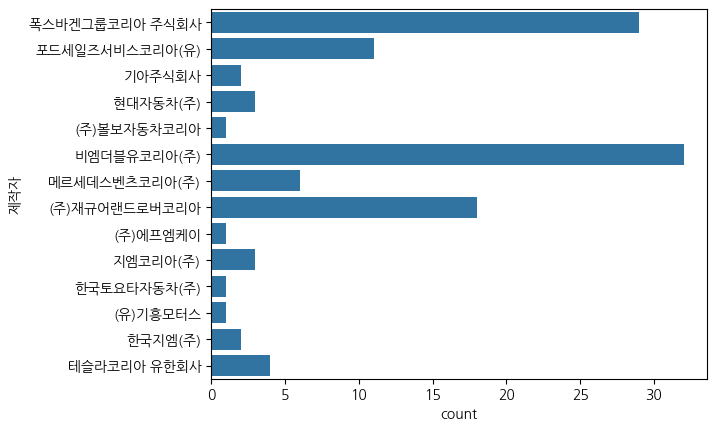

In [12]:
maker = pd.value_counts(df_cars_22['제작자'])
sns.countplot(y='제작자', data=df_cars_22)
print(maker)
plt.show()

### 모델별 리콜 현황

Index(['BMW i7 xDrive60', 'BMW iX M60', 'e-tron S qu.', 'Golf 8 2.0 GTI',
       '218d Active Tourer', 'Model 3', '2022년식 Aviator', 'XT6',
       '2022년식 Bronco', '2022년식 Explorer', 'e-tron 55 quattro',
       'e-tron Sportback 55 qu.', '530i', '530i xDrive', '620d xDrive', '530e',
       '520i', 'BMW X5 xDrive 30d', 'XT5', 'GLC 220 d 4MATIC'],
      dtype='object', name='차명')


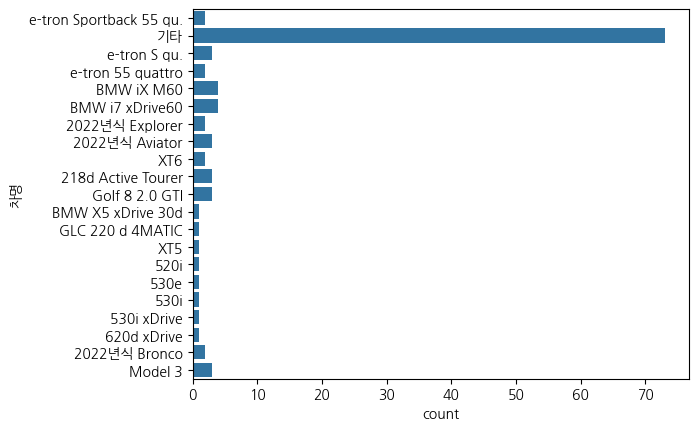

In [16]:
# 차명 컬럼의 상위 20개 값만 사용하고 나머지는 '기타'로 처리
top_20_models = df_cars_22['차명'].value_counts().nlargest(20).index
df_cars_22['차명'] = df_cars_22['차명'].apply(lambda x: x if x in top_20_models else '기타')

sns.countplot(y='차명', data=df_cars_22)
print(top_20_models)
plt.show()

### 월별 리콜 현황

생산기간_월(부터)
1     29
6     23
2     14
5     11
7     10
4      7
3      7
8      6
9      4
10     3
Name: count, dtype: int64


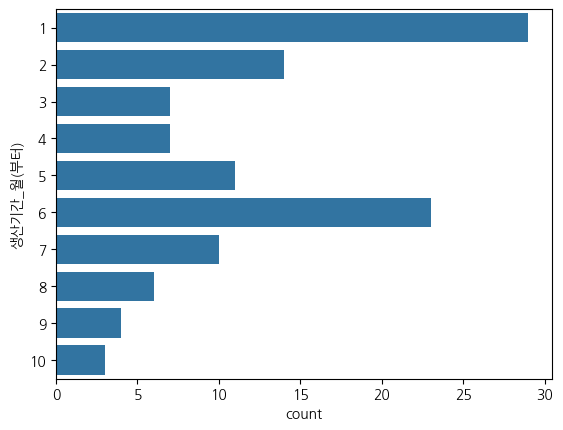

In [14]:
models = pd.value_counts(df_cars_22['생산기간_월(부터)'])
sns.countplot(y='생산기간_월(부터)', data=df_cars_22)
print(models)
plt.show()